In [47]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import h5py
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
import pandas as pd

%matplotlib inline

In [4]:
# Only got 4GB of GPU, limiting the usage of Keras to ~3GB
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)])
  except RuntimeError as e:
    print(e)

In [5]:
train_dataset = h5py.File('datasets/train_happy.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
test_dataset = h5py.File('datasets/test_happy.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [6]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


AxesImage(54,36;152.182x217.44)
AxesImage(236.618,36;152.182x217.44)


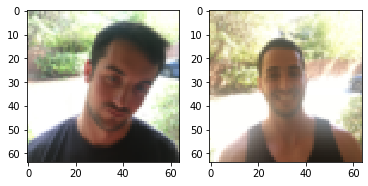

In [65]:
# Example of first image in training set
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
print(ax0.imshow(X_train[0,:,:,:]))
print(ax1.imshow(X_test[0,:,:,:]))

In [41]:
def HappyModel(input_shape):
    
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [48]:
happyModel = HappyModel(X_train.shape[1:])

In [49]:
opt = Adam(learning_rate=0.01)
happyModel.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
happyModel.fit(X_train,Y_train,epochs=200,validation_data=(X_test, Y_test))

Epoch 1/200
19/19 [==============================] - 0s 11ms/step - loss: 2.1648 - val_loss: 1.1297
Epoch 2/200
19/19 [==============================] - 0s 8ms/step - loss: 0.3800 - val_loss: 0.6198
Epoch 3/200
19/19 [==============================] - 0s 8ms/step - loss: 0.1977 - val_loss: 0.6396
Epoch 4/200
19/19 [==============================] - 0s 8ms/step - loss: 0.2255 - val_loss: 0.5261
Epoch 5/200
19/19 [==============================] - 0s 8ms/step - loss: 0.1821 - val_loss: 0.4012
Epoch 6/200
19/19 [==============================] - 0s 8ms/step - loss: 0.1139 - val_loss: 0.3779
Epoch 7/200
19/19 [==============================] - 0s 8ms/step - loss: 0.1031 - val_loss: 0.3542
Epoch 8/200
19/19 [==============================] - 0s 8ms/step - loss: 0.1027 - val_loss: 0.2944
Epoch 9/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0587 - val_loss: 0.2532
Epoch 10/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0690 - val_loss: 0.2290
Epoch 11

Epoch 83/200
19/19 [==============================] - 0s 9ms/step - loss: 0.0152 - val_loss: 0.2385
Epoch 84/200
19/19 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0574
Epoch 85/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.0431
Epoch 86/200
19/19 [==============================] - 0s 9ms/step - loss: 0.0091 - val_loss: 0.0590
Epoch 87/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0125 - val_loss: 0.1109
Epoch 88/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0158 - val_loss: 0.3690
Epoch 89/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0123 - val_loss: 0.0929
Epoch 90/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.2249
Epoch 91/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0131 - val_loss: 0.0502
Epoch 92/200
19/19 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0819


19/19 [==============================] - 0s 9ms/step - loss: 5.4527e-05 - val_loss: 0.0506
Epoch 163/200
19/19 [==============================] - 0s 8ms/step - loss: 5.8501e-05 - val_loss: 0.0520
Epoch 164/200
19/19 [==============================] - 0s 9ms/step - loss: 5.2165e-05 - val_loss: 0.0497
Epoch 165/200
19/19 [==============================] - 0s 8ms/step - loss: 5.7590e-05 - val_loss: 0.0508
Epoch 166/200
19/19 [==============================] - 0s 8ms/step - loss: 6.1630e-05 - val_loss: 0.0487
Epoch 167/200
19/19 [==============================] - 0s 8ms/step - loss: 5.8324e-05 - val_loss: 0.0525
Epoch 168/200
19/19 [==============================] - 0s 8ms/step - loss: 5.8547e-05 - val_loss: 0.0507
Epoch 169/200
19/19 [==============================] - 0s 8ms/step - loss: 6.3515e-05 - val_loss: 0.0498
Epoch 170/200
19/19 [==============================] - 0s 8ms/step - loss: 5.4254e-05 - val_loss: 0.0523
Epoch 171/200
19/19 [==============================] - 0s 8ms/step - 

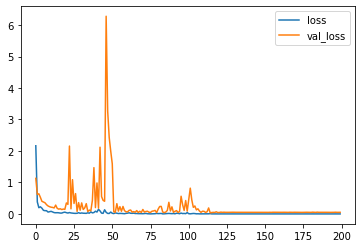

In [51]:
losses = pd.DataFrame(happyModel.history.history)
losses[['loss','val_loss']].plot()

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = happyModel.predict(X_test)
predictions = [1 if i>0.5 else 0 for i in predictions[:,0]]
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.98      1.00      0.99        84

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150

[[64  2]
 [ 0 84]]
